In [1]:
%load_ext autoreload
%autoreload 2

from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load all sessions for Pancho on 221020
MS = load_mult_session_helper(221020, 'Pancho')

Searching using this string:
/mnt/Freiwald/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-161238
session:  0
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-161238
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [2, 3]
Beh Sessions that exist on this date:  {221020: [(2, 'dirshapecolor1b'), (3, 'dirshapecolor1b')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['dirshapecolor1b']
Loading these beh sessions: [2]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/Freiwald/ltian/recordings/Pancho/221

** Loading tank data from local (previusly cached)
== Done
== Trying to load events data
Loading this events (pd) locally to:  /gorilla1/neural_preprocess/recordings/Pancho/221020/Pancho-221020-133436/events_photodiode.pkl
== Done
** MINIMAL_LOADING, therefore loading previuosly cached data
... Generated these...
self.BehTrialMapList [(1, 0)]
self.BehTrialMapListGood {0: (0, 1), 1: (0, 2), 2: (0, 3), 3: (0, 4), 4: (0, 5), 5: (0, 6), 6: (0, 7), 7: (0, 8), 8: (0, 9), 9: (0, 10), 10: (0, 11), 11: (0, 12), 12: (0, 13), 13: (0, 14), 14: (0, 15), 15: (0, 16), 16: (0, 17), 17: (0, 18), 18: (0, 19), 19: (0, 20), 20: (0, 21), 21: (0, 22), 22: (0, 23), 23: (0, 24), 24: (0, 25), 25: (0, 26), 26: (0, 27), 27: (0, 28), 28: (0, 29), 29: (0, 30), 30: (0, 31), 31: (0, 32), 32: (0, 33), 33: (0, 34), 34: (0, 35), 35: (0, 36), 36: (0, 37), 37: (0, 38), 38: (0, 39), 39: (0, 40), 40: (0, 41), 41: (0, 42), 42: (0, 43), 43: (0, 44), 44: (0, 45), 45: (0, 46), 46: (0, 47), 47: (0, 48), 48: (0, 49), 49: (0, 50)

0
200
400
Running D._behclass_tokens_extract_datsegs
0
200
400
stored in self.Dat[BehClass]
Extracted successfully for session:  0
session:  1
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-161238
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [2, 3]
Beh Sessions that exist on this date:  {221020: [(2, 'dirshapecolor1b'), (3, 'dirshapecolor1b')]}
------------------------------
Loading this neural session: 1
Loading these beh expts: ['dirshapecolor1b']
Loading these beh sessions: [3]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-161238
{'filename_component

** Loading tank data from local (previusly cached)
== Done
== Trying to load events data
Loading this events (pd) locally to:  /gorilla1/neural_preprocess/recordings/Pancho/221020/Pancho-221020-161238/events_photodiode.pkl
== Done
** MINIMAL_LOADING, therefore loading previuosly cached data
... Generated these...
self.BehTrialMapList [(1, 0)]
self.BehTrialMapListGood {0: (0, 1), 1: (0, 2), 2: (0, 3), 3: (0, 4), 4: (0, 5), 5: (0, 6), 6: (0, 7), 7: (0, 8), 8: (0, 9), 9: (0, 10), 10: (0, 11), 11: (0, 12), 12: (0, 13), 13: (0, 14), 14: (0, 15), 15: (0, 16), 16: (0, 17), 17: (0, 18), 18: (0, 19), 19: (0, 20), 20: (0, 21), 21: (0, 22), 22: (0, 23), 23: (0, 24), 24: (0, 25), 25: (0, 26), 26: (0, 27), 27: (0, 28), 28: (0, 29), 29: (0, 30), 30: (0, 31), 31: (0, 32), 32: (0, 33), 33: (0, 34), 34: (0, 35), 35: (0, 36), 36: (0, 37), 37: (0, 38), 38: (0, 39), 39: (0, 40), 40: (0, 41), 41: (0, 42), 42: (0, 43), 43: (0, 44), 44: (0, 45), 45: (0, 46), 46: (0, 47), 47: (0, 48), 48: (0, 49), 49: (0, 50)

In [6]:
# get a summary of e.g. units per brain region
MS.print_summary_sessions()

=== N trials per session
601
170
=== N units per session

====== SESSION NUM:  0
M1_m  :  19
M1_l  :  19
PMv_l  :  9
PMv_m  :  12
PMd_p  :  16
PMd_a  :  12
dlPFC_p  :  12
dlPFC_a  :  10
vlPFC_p  :  26
vlPFC_a  :  12
FP_p  :  9
FP_a  :  2
SMA_p  :  23
SMA_a  :  15
preSMA_p  :  25
preSMA_a  :  22
 ------- 
TOTAL:  243
MIN:  2
MAX:  26
MEAN:  15.1875
--------
BAD SITES (n sites)
sites_garbage 26
sites_low_fr 220
sites_low_spk_magn 250
Total (accounting for overlap):  269
------
Summary for each overall region
region, nunits, --, min(sitenum), max(sitenum)
M1_m 19 ---- 2 32
M1_l 19 ---- 33 64
PMv_l 9 ---- 66 96
PMv_m 12 ---- 97 126
PMd_p 16 ---- 130 160
PMd_a 12 ---- 161 192
dlPFC_p 12 ---- 193 224
dlPFC_a 10 ---- 225 256
vlPFC_p 26 ---- 257 288
vlPFC_a 12 ---- 294 318
FP_p 9 ---- 327 352
FP_a 2 ---- 367 368
SMA_p 23 ---- 385 415
SMA_a 15 ---- 417 447
preSMA_p 25 ---- 449 480
preSMA_a 22 ---- 481 506

====== SESSION NUM:  1
M1_m  :  19
M1_l  :  19
PMv_l  :  10
PMv_m  :  12
PMd_p  :  16
PMd

In [7]:
# get session 1
sn = MS.SessionsList[1]

In [8]:
# from this session, get list of sites (just a list of numbers)
sites = sn.sitegetter_all()

In [9]:
# get all sites for a given brain region (list of numbers that ranges from 1:512)
sn.sitegetter_map_region_to_sites('vlPFC_a')

[294, 296, 300, 301, 302, 304, 306, 307, 309, 314, 318]

In [10]:
# get list of good (i.e. attempted) trials in this session (just a list of numbers)
trials = sn.get_trials_list(True) #only_if_ml2_fixation_success=True

In [11]:
# get spiketimes and other metadat for a given [SITE, CHANNEL]
sn.datall_slice_single_bysite(212,62)

{'rs': 2,
 'chan': 212,
 'trial0': 62,
 'pre_dur': 1.0,
 'post_dur': 1.0,
 'time_range': array([923.61490176, 938.0185728 ]),
 'raw': array([], dtype=float64),
 'tbins0': array([], dtype=float64),
 'fs': None,
 'spike_times': array([-8.60968780e-01, -7.68767820e-01, -6.95695180e-01, -6.60797260e-01,
        -5.54915660e-01, -5.32019020e-01, -5.28906060e-01, -1.46413998e-03,
         6.49729800e-02,  1.48695220e-01,  4.14976180e-01,  5.08446900e-01,
         1.11465490e+00,  1.17920786e+00,  1.43123474e+00,  2.07004690e+00,
         2.15733266e+00,  2.30847506e+00,  2.30970386e+00,  2.46809618e+00,
         2.47530514e+00,  2.49177106e+00,  2.76440082e+00,  2.78127634e+00,
         2.84226578e+00,  3.02023698e+00,  3.15880466e+00,  3.43172114e+00,
         3.46465298e+00,  3.58118418e+00,  3.60858642e+00,  3.66138386e+00,
         3.71520530e+00,  3.93126930e+00,  3.97452306e+00,  4.16007186e+00,
         4.19804178e+00,  4.21450770e+00,  4.45842450e+00,  4.64208914e+00,
         4.7080

KeyError: 'fix_touch'

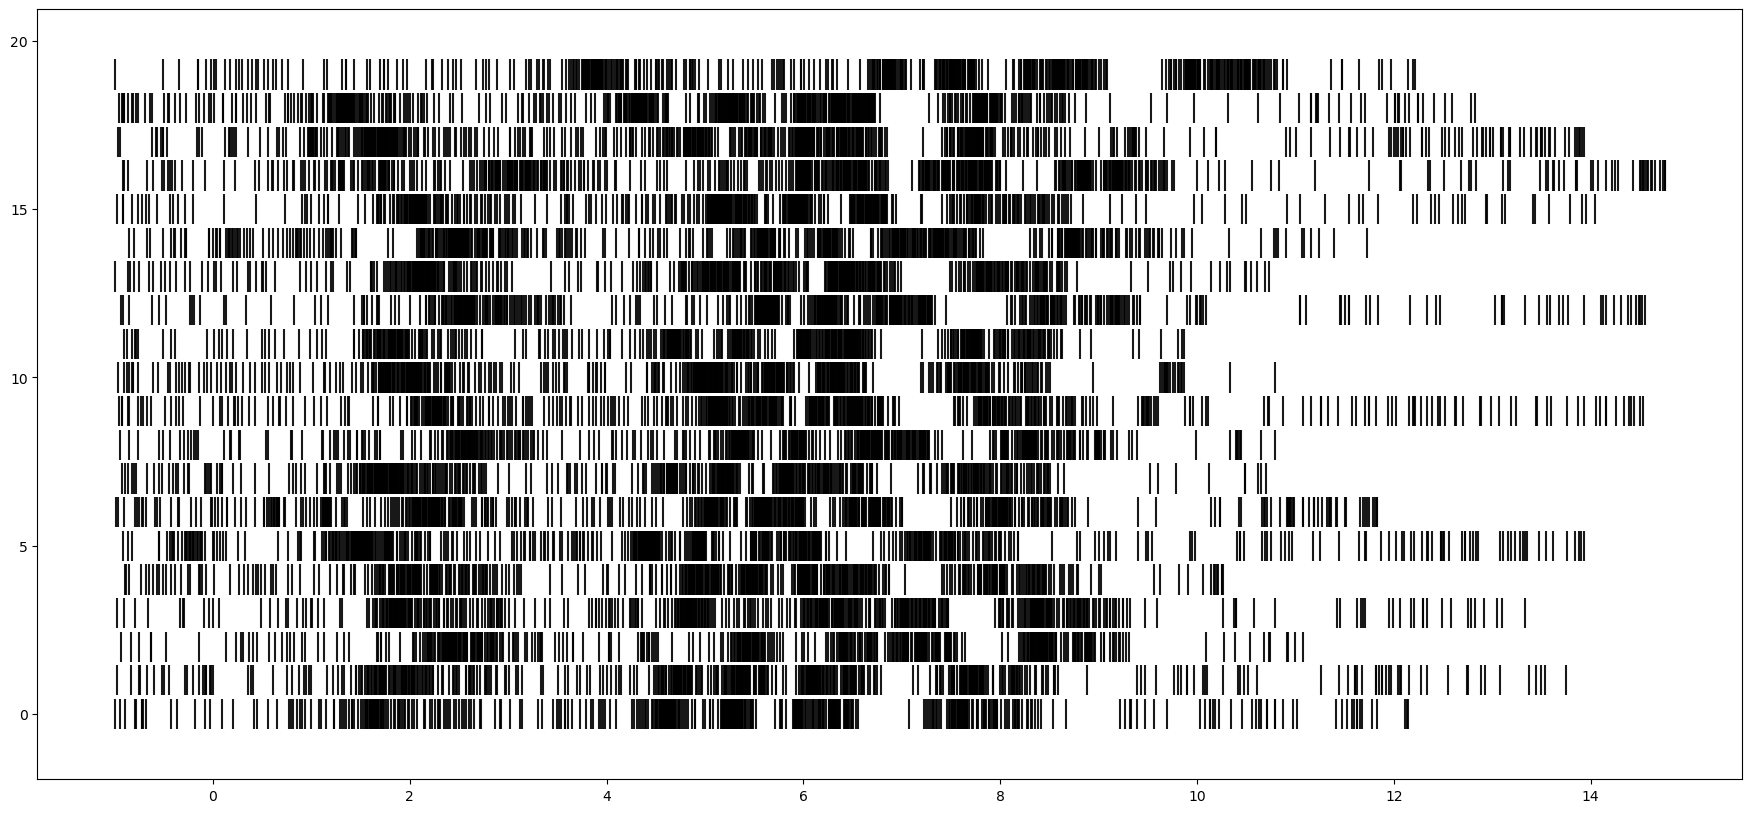

In [12]:
# plot multiple trials for a given site
sn.plotwrapper_raster_multrials_onesite(trials[80: 100], 62)

In [ ]:
# plot multiple trials for a given site, and align to a task event (e.g. go, doneb)
sn.plotwrapper_raster_multrials_onesite(trials[80: 100], 298, alignto="go");

In [ ]:
# plot one trial for MULTIPLE sites (also makes plots for photodiodes, eyetracking etc.)
sn.plotwrapper_raster_oneetrial_multsites(110,sites)

In [ ]:
# x-coordinate of eye, but in terms of voltage not screen
# (will have to scale/rotate to get screen coordinates)
times_x, vals_x, fs_x = sn.extract_data_tank_streams("eyex", 110, ploton=True)

In [ ]:
#%matplotlib notebook
times_y, vals_y, fs_y = sn.extract_data_tank_streams("eyey", 110, ploton=True)

In [ ]:
# EYE VISUALIZATION 1: dots
plt.figure()
plt.scatter(vals_x, vals_y)

In [ ]:
# EYE VISUALIZATION 2: heatmap (hex)
plt.figure()
plt.hexbin(vals_x, vals_y,cmap="cividis")

In [ ]:
# EYE VISUALIZATION 3: heatmap (hist2d)
plt.figure()
plt.hist2d(vals_x,vals_y,bins=40);

In [ ]:
# ???
fig, ax = plt.subplots(1,1)
sn.plotwrapper_smoothed_multtrials_multsites_timewindow(sites[:1], trials[:20], ax=ax)

In [ ]:
# aligning neural trial # to behavior trial # (as there is usually an offset)
t = trials[90]
idx = sn.datasetbeh_trial_to_datidx(t)
print(t, idx)
sn.Datasetbeh.Dat.iloc[idx]

In [ ]:
# --- make histogram of diffs, is it bimodal? (if so, split as saccades/fixations, otherwise )
d = np.diff(vals_x); 
d = d[np.abs(d) < 1];
t = np.arange(len(d));
plt.figure()
plt.plot(t,d)
#d2 = np.diff(d)
#d2_clean = d2[np.abs(d2) < 1]
#plt.hist(d2_clean,bins=100,log=True);

In [ ]:
##func(ax, eye_x_values, eye_y_values) --> ax (with drawing on top).
#import matplotlib.pyplot as plt
#fig, axes = plt.subplots(2,2)
#ax = axes.flatten()[3]
#ax.plot(1,1,'ok')

In [ ]:
# get affine-transformed data (e.g. relative to screen)
x_aff = sn.beh_extract_eye_good(113)[1][:,0]
y_aff = sn.beh_extract_eye_good(113)[1][:,1]

# SMOOTH DATA
from pythonlib.pythonlib.tools.timeseriestools import smoothDat
x_aff_sm = smoothDat(x_aff, window_len=10)
y_aff_sm = smoothDat(y_aff, window_len=10)

In [ ]:
strk = sn.strokes_extract(113)

# get time of first element in each array, for "stroke onset", and then subsample data for eyetracking on this
onset = strk[0][0,2]
offset = strk[-1][-1,2]

In [ ]:
times = sn.beh_extract_eye_good(113)[0]
inds = (times>onset) & (times<offset)

plt.figure()
plt.scatter(x_aff_sm[inds], y_aff_sm[inds],c=range(sum(inds)))

In [ ]:
# yarbus
plt.figure()
plt.scatter(x_aff_sm, y_aff_sm,c=range(len(x_aff_sm)))

In [ ]:
fig, ax = plt.subplots(1,1)
sn.plot_final_drawing(ax, 113)

In [ ]:
# heatmap
plt.figure()
plt.hist2d(x_aff_sm,y_aff_sm,bins=100);

In [ ]:
# x-plot
plt.figure()
times = range(0,len(x_aff_sm))
plt.plot(times,x_aff_sm)

In [ ]:
# y-plot
plt.figure()
plt.plot(times,y_aff_sm)

### Snippets

Collects data aligned to instances of a given event. Can then use the Snippets methods to do many things, plotting, analysis, etc.